Praktikum 7 Perbaikan Kualitas Citra (Histogram)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1 Histogram Citra

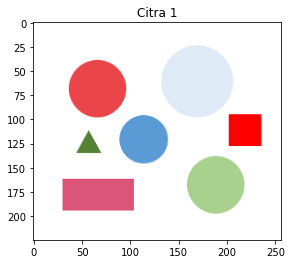

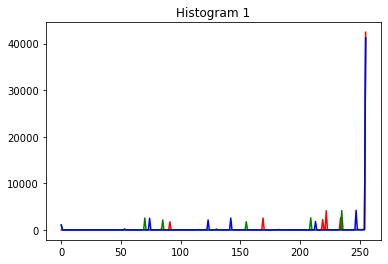

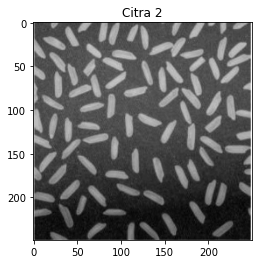

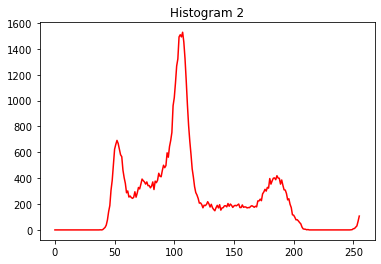

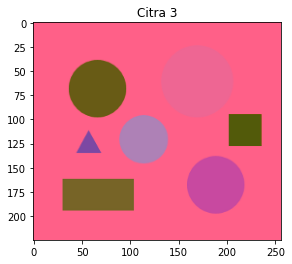

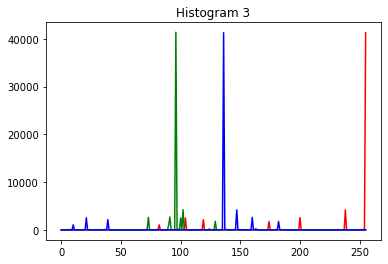

In [2]:
file = 'data/bentukwarna.png'
citra = cv2.imread(file)
citra = cv2.cvtColor(citra, cv2.COLOR_BGR2RGB)

citraHsv = cv2.cvtColor(citra, cv2.COLOR_BGR2Luv)

file2 = 'data/beras.png'
citraGray = cv2.imread(file2, 0)

image = [citra, citraGray, citraHsv]

for i in range(3):
    if citra is None:
        print('Tidak dapat membaca berkas', file)
    else:
        nkali = 0
        if len(image[i].shape) > 2:
            nkali = 3
            plt.imshow(image[i])
        else:
            nkali = 1
            plt.imshow(image[i], cmap=plt.get_cmap('gray'))
        plt.title(f'Citra {i+1}')
        plt.show()

        warna = ('r', 'g', 'b')
        for kanal in range(nkali):
            histo = cv2.calcHist([image[i]], [kanal], None, [256], [0, 256])
            plt.plot(histo, color = warna[kanal])
        plt.title(f'Histogram {i+1}')
        plt.show()

2 Ekualisasi

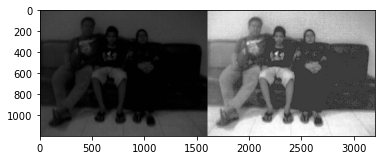

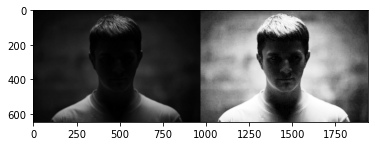

In [3]:
citra = cv2.imread('data/my-dream.jpg', 0)
citra2 = cv2.imread('data/gambar-gelap.jpg', 0)
ekual = cv2.equalizeHist(citra)
ekual2 = cv2.equalizeHist(citra2)
hasil1 = np.hstack((citra, ekual))
hasil2 = np.hstack((citra2, ekual2))

plt.imshow(hasil1, cmap = plt.get_cmap('gray'))
plt.show()

plt.imshow(hasil2, cmap = plt.get_cmap('gray'))
plt.show()

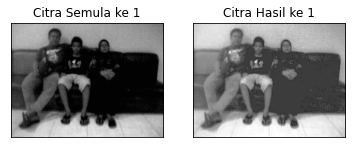

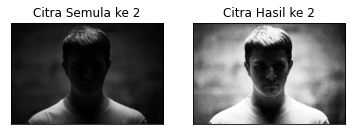

In [4]:
plt.subplot(121)
plt.imshow(citra, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Citra Semula ke 1')

plt.subplot(122)
plt.imshow(ekual, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Citra Hasil ke 1')

plt.show()

plt.subplot(121)
plt.imshow(citra2, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Citra Semula ke 2')

plt.subplot(122)
plt.imshow(ekual2, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Citra Hasil ke 2')

plt.show()

3 Menggunakan Clahe - Gray

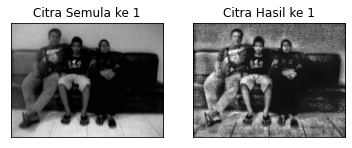

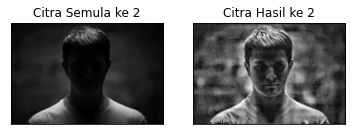

In [5]:
clahe = cv2.createCLAHE(clipLimit = 12, tileGridSize = (16, 16))
ekual = clahe.apply(citra)
ekual2 = clahe.apply(citra2)
hasil = np.hstack((citra, ekual))
hasil2 = np.hstack((citra2, ekual2))

plt.subplot(121)
plt.imshow(citra, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Citra Semula ke 1')

plt.subplot(122)
plt.imshow(ekual, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Citra Hasil ke 1')

plt.show()

plt.subplot(121)
plt.imshow(citra2, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Citra Semula ke 2')

plt.subplot(122)
plt.imshow(ekual2, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Citra Hasil ke 2')

plt.show()

4 Ekualisasi Citra Warna

In [7]:
citra = cv2.imread('data/zero.png')
lab = cv2.cvtColor(citra, cv2.COLOR_BGR2LAB)
kenalLAB = np.array(cv2.split(lab))

print(type(kenalLAB))
print(kenalLAB[0])

kenalLAB[0] = cv2.equalizeHist(kenalLAB[0])

lab = cv2.merge(kenalLAB)
bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

hasil = np.hstack((citra, bgr))

cv2.imshow('Hasil', hasil)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]]
